In [1]:
# Import necessary libraries
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('netflix_data.csv')

In [33]:
# Check the shape, column names, info of the data

print("Shape of the dataset:", df.shape) 
print("Columns:", df.columns.tolist()) 
df.head()  
df.info()  

Shape of the dataset: (8807, 16)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'year_added', 'month_added', 'genres', 'countries']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  desc

In [5]:
print("Missing values:\n", df.isnull().sum())  # Counts nulls per column

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
# Handle missing values
df['director'].fillna('Unknown', inplace=True)  # Fill missing directors with 'Unknown'
df['cast'].fillna('Unknown', inplace=True)     
df['country'].fillna('Unknown', inplace=True)  
df['date_added'].fillna('Unknown', inplace=True)  
df['rating'].fillna('Unknown', inplace=True)   
df['duration'].fillna('Unknown', inplace=True) 

In [7]:
print("Missing values:\n", df.isnull().sum()) # Re-checking for missing values

Missing values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
# Convert 'date_added' to datetime for time-based analysis
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Coerce ignores errors

In [9]:
# Extract 'year_added' and 'month_added' for trends & charts
df['year_added'] = df['date_added'].dt.year  # e.g., 2021
df['month_added'] = df['date_added'].dt.month  # e.g., 9 for September

In [10]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [12]:
df.shape

(8807, 14)

In [13]:
# Exploratory Data Analysis and Visualizations

In [14]:
# Visualization 1: Time-Series Plot (Content Over Years)

# Group by year_added and count titles
content_over_years = df.groupby('year_added').size().reset_index(name='count')

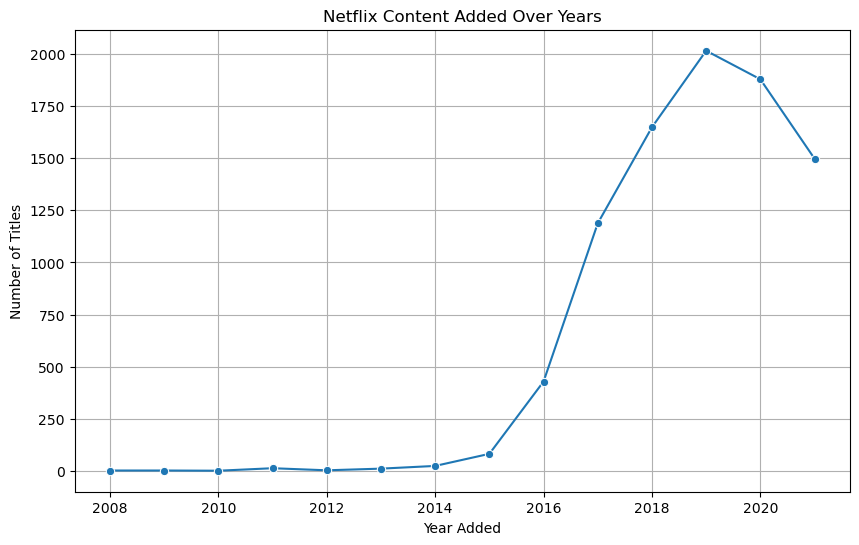

In [15]:
# Plot
plt.figure(figsize=(10, 6))  # Set size for readability
sns.lineplot(x='year_added', y='count', data=content_over_years, marker='o')
plt.title('Netflix Content Added Over Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)  # Adds grid for better reading
plt.show()

In [ ]:
# Observation: An increase in the number of netflix content started from the year 2014 which was the time when Netflix launched in six major European countries (Austria, Belgium, France, Germany, Luxembourg, Switzerland) and secured thousands of local-language titles through licensing deals with European studios. Netflix also did the same in 2015 and expanded to Asia, Australia/New Zealand, and Southern Europe. In 2016 was the one-day simultaneous launch into 130+ countries including Africa. 

# Hence reaching 190+ countries with heavy emphasis on localization demanded an instant content flood causing an increase in subscriber growth.

# The decline is most likely due to the COVID-19 pandemic rules and restrictions placed by authoritis

In [16]:
# Visualization 2: Movies vs. TV Shows Count (Bar Chart)

In [17]:
# Count types
type_counts = df['type'].value_counts()

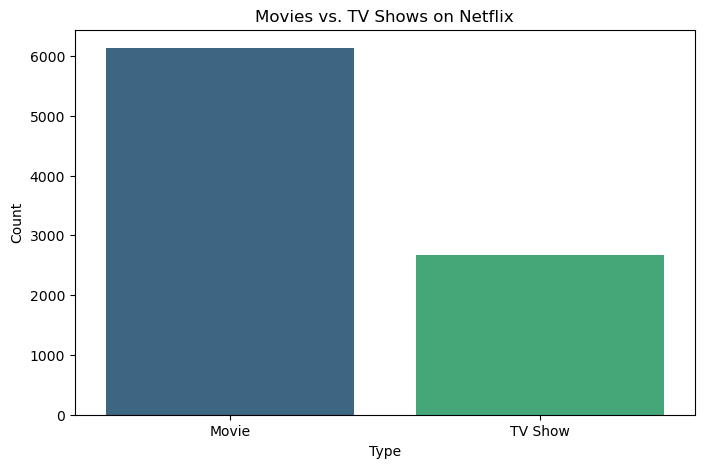

In [18]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Movies vs. TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Observation: It is already noted that Netflix had just expanded to about 190+ countries, so it makes sense that they will like to build a vast movie library to quickly catr to a broad audience seeking instant entertainment also considering the production timelines and cost considerations of Movies & TV shows

In [20]:
df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0


In [21]:
# Visualization 3: Top Genres or Categories (Bar Chart)

In [22]:
# Split 'listed_in' (genres are comma-separated)
df['genres'] = df['listed_in'].str.split(', ')  # Split into lists
genres_exploded = df.explode('genres')  # One row per genre

In [23]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,"[International TV Shows, Romantic TV Shows, TV..."


In [24]:
# Top 10 genres
top_genres = genres_exploded['genres'].value_counts().head(10)

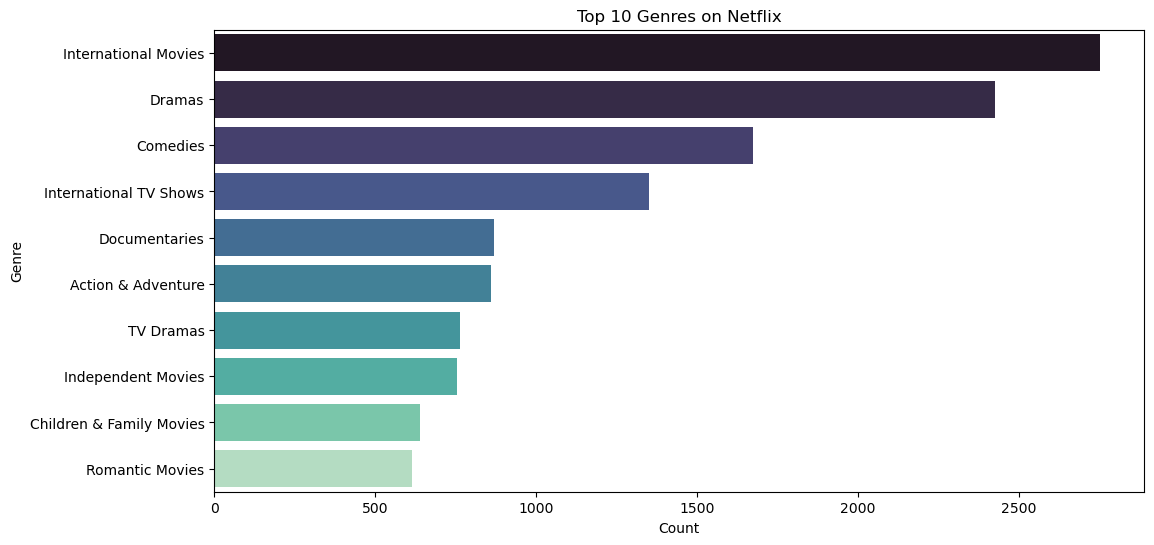

In [25]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# The dominance of international movies over romantic and children & family movies reflects Netflix's global expansion, targeting diverse adult audiences with localized content. This strategic shift, driven by cost efficiency and competitive differentiation, contrasts with the niche appeal of romance and family genres, which face stiff competition from rivals like Disney+

In [26]:
# Visualization 4: Country-Wise Content Distribution (Bar Chart)

In [27]:
# Split countries (some have multiples)
df['countries'] = df['country'].str.split(', ')
countries_exploded = df.explode('countries')

In [28]:
# Top 10 countries (exclude 'Unknown')
top_countries = countries_exploded['countries'].value_counts().head(10).drop('Unknown', errors='ignore')

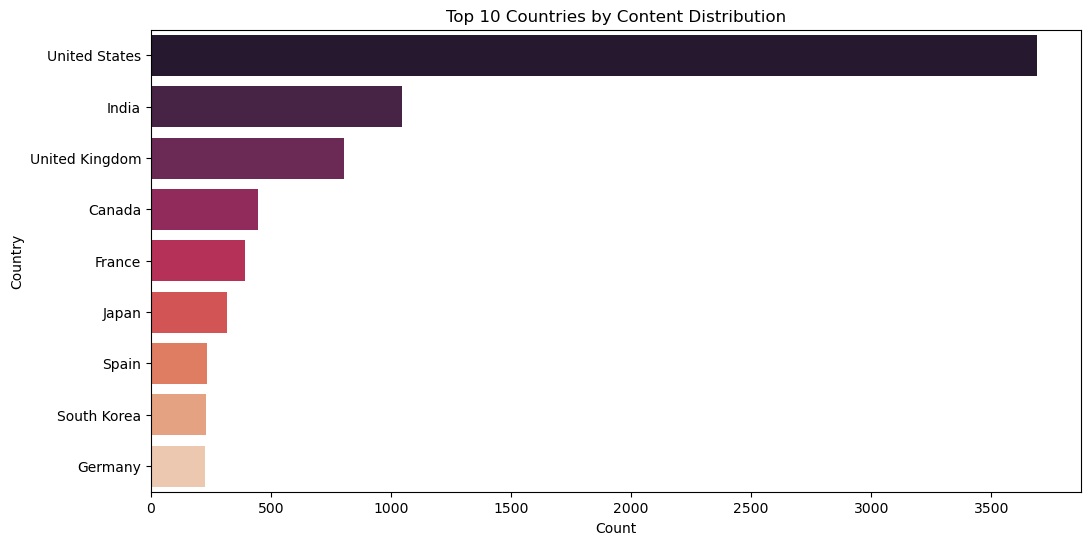

In [29]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('Top 10 Countries by Content Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [ ]:
# "The USA leads content distribution due to its historical role as Netflix’s origin, vast production capacity, and large subscriber base, outstripping South Korea and Germany."

In [30]:
# Visualization 5: Ratings Distribution - Pie Chart

In [31]:
# Top ratings (exclude 'Unknown')
ratings_counts = df['rating'].value_counts().head(10).drop('Unknown', errors='ignore')

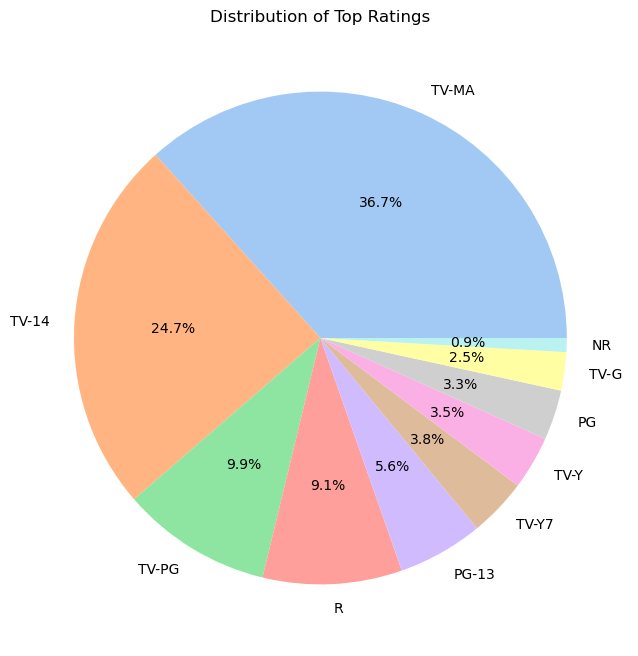

In [32]:
# Plot
plt.figure(figsize=(8, 8))
plt.pie(ratings_counts, labels=ratings_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Top Ratings')
plt.show()

In [ ]:
# TV-MA leads due to Netflix’s focus on adult audiences and originals, while TV-G lags proably due to competition from family-focused platforms.

In [34]:
# Additional EDA Questions Answered:

# Trends Observed: Content additions grew rapidly from 2010-2020, with a focus on producing international movies which suggests a move towards international expansion.

# Dominant Countries/Genres: US/India for countries; Dramas/International Movies for genres.

# More Content Over Time?: Yes, from <100/year before 2010 to >1000/year post-2018.

# Surprising Discoveries: High proportion of international content suggests globalization; recent dip in additions (post-2020) which might be due to COVID-19 pandemics.

In [ ]:
# Summary Report Update

# My First Dive into Netflix Data: What I Learned as a Beginner Data Scientist

# Hey everyone, I'm just starting out in data science, and wow, this Netflix movie analysis project was my first real hands-on experience! I used Python in a Jupyter notebook to load and clean the data from a CSV file, then created some cool visualizations like line plots and bar charts to explore trends. As a newbie, it was exciting (and a bit tricky) figuring out how to handle missing values and split columns for genres and countries. The dataset had over 8,800 entries on movies and TV shows, and I focused on answering key EDA questions. Overall, I observed a huge spike in content additions starting around 2014, which kept growing until about 2020 before dipping a little. This trend makes sense because Netflix was expanding globally—like launching in Europe in 2014, Asia and more in 2015, and then booming into 130+ countries in 2016. They had to flood their library with localized stuff to keep new subscribers hooked, leading to that rapid increase in titles over time.

# Diving deeper, the United States totally dominates the country-wise distribution with way more content (around 2,800 titles) compared to places like South Korea or Germany (a few hundred each). I think it's because Netflix started in the US and has Hollywood's massive production machine behind it, plus a huge subscriber base there. For genres, international movies and dramas are the big winners, outpacing romantic movies or children & family ones. As a beginner, this surprised me—Netflix seems to target diverse adult audiences with global stories, probably because it's cheaper and helps them stand out against competitors like Disney+ who own the family niche. Movies also outnumber TV shows almost 2:1 (about 6,100 vs. 2,700), which I learned is likely due to movies being quicker and easier to license during Netflix's early growth phases, especially with all those international expansions needing instant entertainment options.

# Is Netflix producing more content over time? Definitely yes, at least up to the peak in 2019-2020, but the slight decline after might be from COVID-19 restrictions messing with productions. One insightful discovery for me was the ratings: TV-MA (mature) has the highest share at around 36%, way above TV-G (general audience), because Netflix focuses on adult viewers with edgy, binge-worthy stuff rather than kid-friendly content. As a rookie, this project taught me how data tells a story—Netflix's shift to global, mature content is all about strategy and competition. It was super rewarding seeing my plots reveal these patterns, and I can't wait to tackle more projects!